# MI - Exercise Sheet 8 - Belugas on the run

## H.8.2

In [1]:
import numpy as np

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt

import math

import operator


var = 2
cov = [[var, 0], [0, var]]

def generatedata(P):
    x1 = np.random.multivariate_normal([0,1],cov,int(P/2))
    x2 = np.random.multivariate_normal([1,0],cov,int(P/2))

    X = np.zeros((P,2))
    X[:int(P/2),:] = x1
    X[int(P/2):P,:] = x2

    Y = np.zeros(P)
    Y[:int(P/2)] = 1
    Y[int(P/2):P] = -1

    data_set = np.zeros((P,3))
    data_set[:,:2]=X
    data_set[:,2]=Y
    
    return data_set



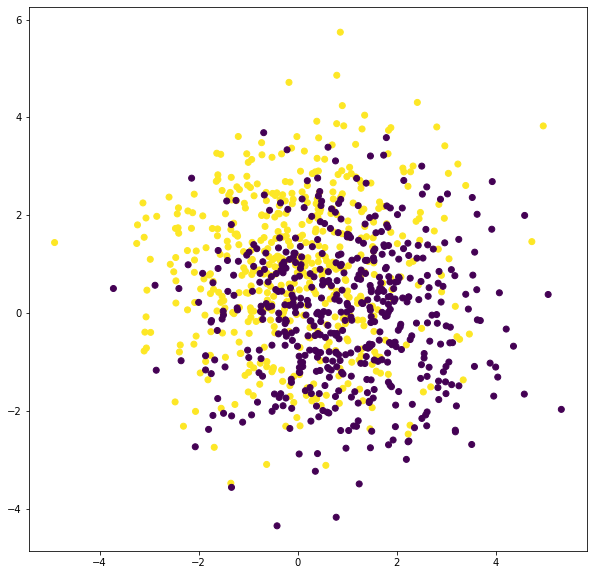

In [2]:

check = generatedata(1000)

plt.figure(figsize=(10,10))
plt.scatter(check[:,0],check[:,1],c=check[:,2]);

In [3]:
# calculate the analytical solution to the weights that minimise the quadratatic error

def getweights(dataset):
    datawbias = np.ones(dataset.shape) #include a row of 1s for the bias node
    datawbias[:,1:3] = dataset[:,:2]
    return np.linalg.inv(datawbias.T@datawbias)@datawbias.T@dataset[:,2]
    

In [4]:
#calculate the predictions on unseen test data for later performance measures

def find_prediction(Weights, Testdata):
    "find the values predicted by the model based on the input weights"
    
    return np.sign(Weights[0] + Testdata@Weights[1:3])
 

In [5]:
#calculating the mean and standard deviation of all impotant results with 50 iterations for each p

p = [2,4,6,8,10,20,40,100] #assuming the 3 was a typo
testpoints = 1000


Mean_rtrain = np.zeros(len(p))
Mean_rtest = np.zeros(len(p))
Std_rtrain = np.zeros(len(p))
Std_rtest = np.zeros(len(p))
Mean_w = np.zeros((3,len(p)))
Std_w = np.zeros((3,len(p)))


for counter2,j in enumerate(p):
    r_train = np.zeros(50)
    r_test = np.zeros(50)
    weights_model = np.zeros((50,3))
    for counter, i in enumerate(np.arange(0,50,1)):
        train_data = generatedata(j)
        weights =getweights(train_data)
        test_data = generatedata(testpoints)
        test_input = test_data[:,:2]
        target_values = test_data[:,2]
        performance_test = np.sum(np.equal(find_prediction(weights,test_input), target_values)) / (testpoints)
        performance_training = np.sum(np.equal(find_prediction(weights,train_data[:,:2]), train_data[:,2])) / (j)
        r_train[counter] = performance_training
        r_test[counter] = performance_test
        weights_model[counter,:] = weights
    mean_rtrain = np.mean(r_train)
    mean_rtest = np.mean(r_test)
    std_rtrain = np.std(r_train)
    std_rtest = np.std(r_test)
    mean_w = np.mean(weights_model, axis=0)
    std_w = np.std(weights_model, axis=0)
    Mean_rtrain[counter2] = mean_rtrain
    Mean_rtest[counter2] = mean_rtest
    Std_rtrain[counter2] = std_rtrain
    Std_rtest[counter2] = std_rtest
    Mean_w[:,counter2] = mean_w
    Std_w[:,counter2] = std_w
   
        




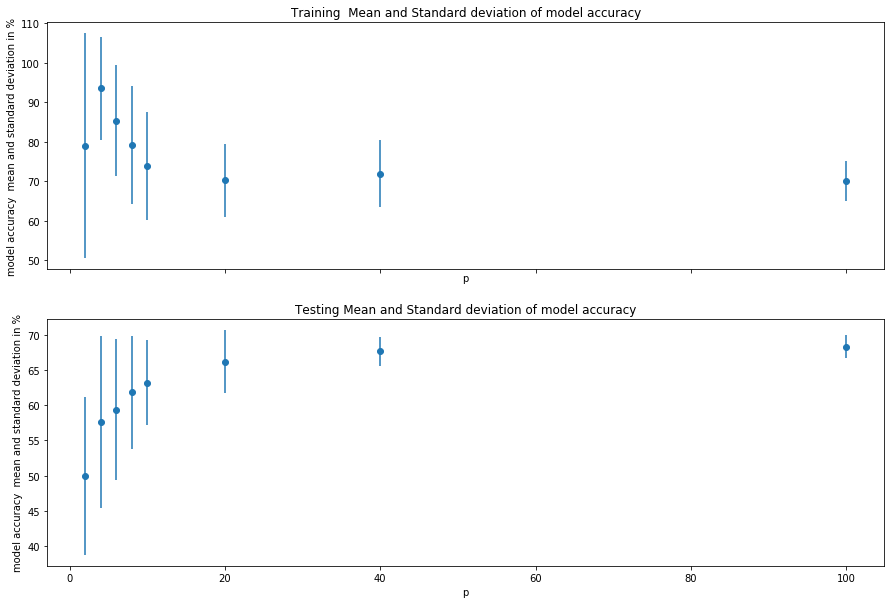

In [6]:
#plot all results
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (15,10))
ax = axs[0]
ax.errorbar(p, Mean_rtrain*100, yerr=Std_rtrain*100,  fmt='o')
ax.set_title('Training  Mean and Standard deviation of model accuracy')
ax.set_xlabel('p')
ax.set_ylabel('model accuracy  mean and standard deviation in %')
ax = axs[1]
ax.errorbar(p, Mean_rtest*100, yerr=Std_rtest*100, fmt='o')
ax.set_title('Testing Mean and Standard deviation of model accuracy')
ax.set_xlabel('p')
ax.set_ylabel('model accuracy  mean and standard deviation in %');




As can be seen from the plot of some example data above the model can only determine some of the datapoints with certainty and some proportion will always have to be "guessed". From the plots here we an see that with an increasing amount of data points the accuracy of the model increases and the variance decreases (more correct classifications and less divergence from the average accuracy). This makes sense as more datapoints mean the distribution is much better described and. Especially in the low range of p the accuracy in the testing goes up fast when more points are considered, later on the accuracy levels off due to the nature of the data. The curve is shaped the opposite way for the training data as little points will be easier to seperate whilst many points are not anymore.

AssertionError: 

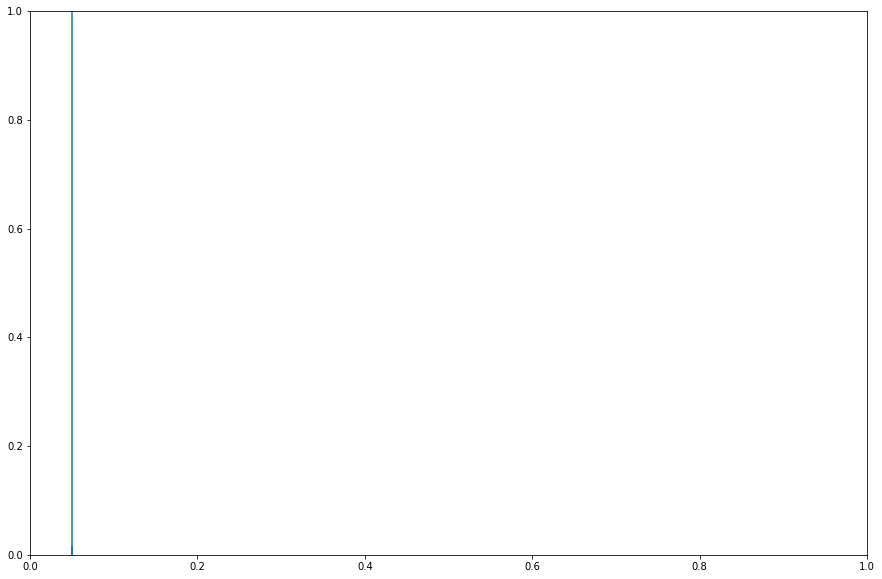

In [18]:
plt.figure(figsize=(15,10))
plt.errorbar(p, Mean_w[0,:], yerr=Std_w[0,:],label = "theta = w0")
plt.errorbar(p, Mean_w[1,:], yerr=Std_w[1,:], label = 'w1')
plt.errorbar(p, Mean_w[2,:], yerr=Std_w[2,:],label = 'w2')
plt.title("Mean and Standard Deviation of Weights")
plt.xlabel("p")
plt.ylabel("Mean and Standard Deviation")
plt.legend()

The weights starts very large (and with large variability) for small p and then tail off to become very small with the bias close to zero and the other two below and above.

## H8.3

In [15]:
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson

       
def plot_binomial():
    
    fig, axs = plt.subplots(3, 9, sharey = True, sharex = False, \
                           figsize = (20,10))
    
    #Counter variables for plotting:
    
    i = 0
    j = 0
    
    for nI, n in np.ndenumerate(np.array([25,50,100])):
        
        for pI, p in np.ndenumerate(np.arange(.1,1,.1)):
            
            x = np.arange(binom.ppf(.01, n, p),\
                         binom.ppf(.99, n, p))
            
            axs[i,j].bar(x, binom.pmf(x,n, p), \
                         label = ' n = {}, p = {}'. format(n, p),\
                         color = 'C{}'.format(i)\
                        )
            axs[i,j].set_xlabel('k')
            axs[0,j].set_title('p = {}'. format(round(p, 2)))
            axs[i,0].set_ylabel('Probability, (n = {})'.format(n))
        
           
            
            if j % 8 == 0 and j != 0:
                
                i += 1
                j = 0
                
            else:
                
                j += 1        

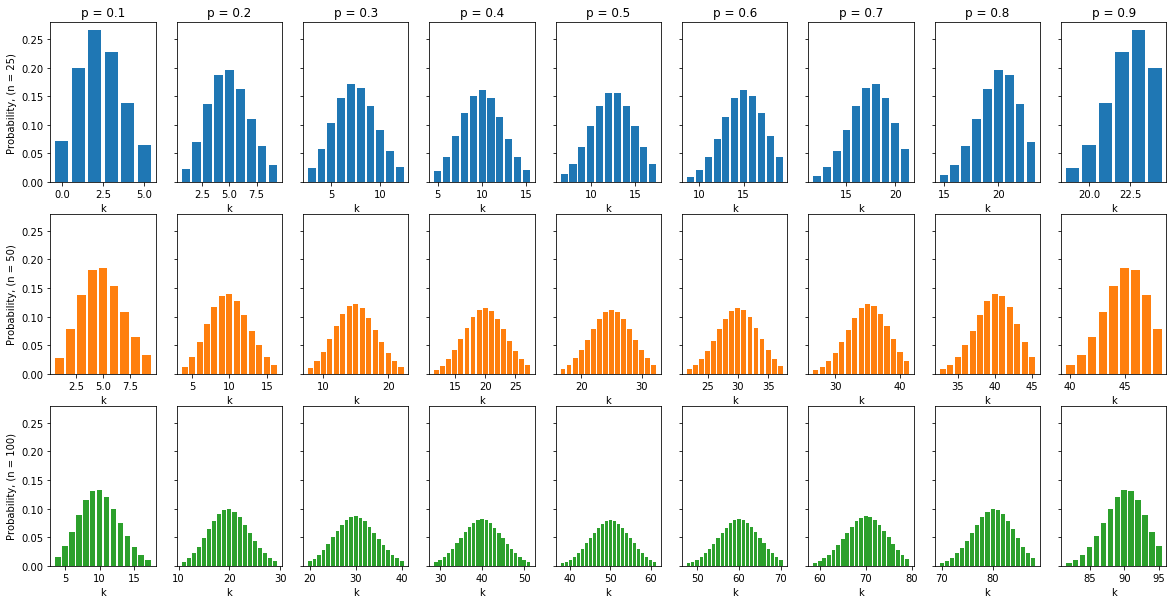

In [16]:
plot_binomial()

$\textbf{Answer:}$ The assumption is reasonable for large $n$. This fact follows from the the central limit theorem.  From this theorem we can also estimate the average error that follows from approximating a binomial distribution by a Gaussian with mean $np$ and variance $np(1 - p)$ as $\frac{1}{\sqrt{n}}$. Therefore if we have very small sample-sizes we will  sometimes find that the Gaussian distribution is very bad for approximating a binomial one (of course, the normal distribution will also give us a bad approximation if we choose the wrong moments, but that is trivial).

$\textbf{Answer:}$ The Poisson is a good approximation of the binomial distribution under the following conditions: Let $X_1$ and $X_1$ be Pois($\lambda_1$) and Pois($\lambda_2$) distributed  random variables; then $X_1 | X_1 + X_2$ is an approximately binomially distributed random variable, if $X_1$ and $X_2$ are independent. Generally, if $n \rightarrow \infty$ and $p \rightarrow 0$ and $np \rightarrow \lambda$, then a binomial distribution can be modelled by a Poisson distribution.

$\textbf{Answer:}$ The following four plots consider cases in which Poisson and Gaussian distributions are good approximations of the binomial distribution and bad ones respecctively.

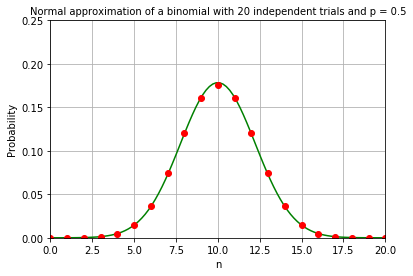

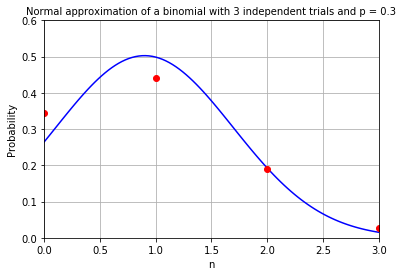

In [10]:
#for a good normal approximation we use n=20 and p = 0.5

n = 20 # for nomral approx. of binomial use mean = np
p = 0.5 # for nomral approx. of binomial use var = np(p-1)

#for a bad normal approximation we use n=3 and p = 0.3
n2 = 3
p2 = 0.3

x = np.linspace(0, n, 100)
x2 = np.linspace(0, n2, 100)

y = norm.pdf(x,n*p,np.sqrt(n*p*(1-p)))
y2 = norm.pdf(x2,n2*p2,np.sqrt(n2*p2*(1-p2)))

plt.figure()
plt.plot(x,y, color='green')
plt.plot(range(n+1), binom.pmf(range(n+1),n,p),'ro')

plt.grid()

plt.xlim(0,n)
plt.ylim(0,0.25)

plt.title('Normal approximation of a binomial with 20 independent trials and p = 0.5',fontsize=10)

plt.xlabel('n')
plt.ylabel('Probability')
plt.show()

plt.figure()
plt.plot(x2,y2, color='blue')
plt.plot(range(n2+1), binom.pmf(range(n2+1),n2,p2),'ro')
plt.grid()

plt.xlim(0,n2)
plt.ylim(0,0.6)

plt.title('Normal approximation of a binomial with 3 independent trials and p = 0.3',fontsize=10)

plt.xlabel('n')
plt.ylabel('Probability')
plt.show()

The first approximation is very good but it can be seen that the skewedness of the binomial is not catured in the second approximation.

The Poisson distribution is a good approximation when the number of trials is large and the probability of succes is very small. We use a poisson rate lambda = n*p.

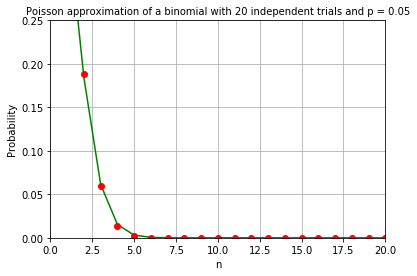

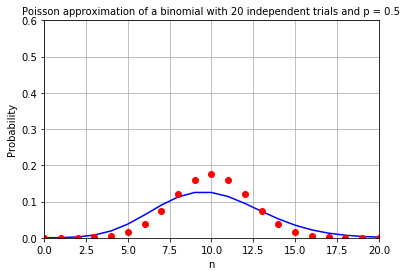

In [11]:
#for a good poisson approximation we use n=20 and p = 0.05

n = 20 
p = 0.05 

#for a bad poisson approximation we use n=20 and p = 0.5
n2 = 20
p2 = 0.5

x = range(n+1)
x2 = range(n2+1)

y = poisson.pmf(x,n*p)
y2 = poisson.pmf(x2,n2*p2)

plt.figure()
plt.plot(x,y, color='green')
plt.plot(x, binom.pmf(x,n,p),'ro')

plt.grid()

plt.xlim(0,n)
plt.ylim(0,0.25)

plt.title('Poisson approximation of a binomial with 20 independent trials and p = 0.05',fontsize=10)

plt.xlabel('n')
plt.ylabel('Probability')
plt.show()

plt.figure()
plt.plot(x2,y2, color='blue')
plt.plot(x2, binom.pmf(x2,n2,p2),'ro')
plt.grid()

plt.xlim(0,n2)
plt.ylim(0,0.6)

plt.title('Poisson approximation of a binomial with 20 independent trials and p = 0.5',fontsize=10)

plt.xlabel('n')
plt.ylabel('Probability')
plt.show()